## Visualization of quantum states and processes

Visualization is often an important complement to a simulation of a quantum mechanical system. The first method of visualization that come to mind might be to plot the expectation values of a few selected operators. But on top of that, it can often be instructive to visualize for example the state vectors or density matices that describe the state of the system, or how the state is transformed as a function of time (see process tomography below). In this section we demonstrate how QuTiP and matplotlib can be used to perform a few types of visualizations that often can provide additional understanding of quantum system.


## Fock-basis probability distribution

In quantum mechanics probability distributions plays an important role, and as in statistics, the expectation values computed from a probability distribution does not reveal the full story. For example, consider an quantum harmonic oscillator mode with Hamiltonian 𝐻=ℏ𝜔𝑎†𝑎
H
=
ℏ
ω
a
†
a
, which is in a state described by its density matrix 𝜌
ρ
, and which on average is occupied by two photons, Tr[𝜌𝑎†𝑎]=2
T
r
[
ρ
a
†
a
]
=
2
. Given this information we cannot say whether the oscillator is in a Fock state, a thermal state, a coherent state, etc. By visualizing the photon distribution in the Fock state basis important clues about the underlying state can be obtained.

One convenient way to visualize a probability distribution is to use histograms. Consider the following histogram visualization of the number-basis probability distribution, which can be obtained from the diagonal of the density matrix, for a few possible oscillator states with on average occupation of two photons.

First we generate the density matrices for the coherent, thermal and fock states.

In [1]:
# setup the matplotlib graphics library and configure it to show 
# figures inline in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import matplotlib as mpl

In [2]:
# make qutip available in the rest of the notebook
from qutip import *

In [3]:
N = 20
rho_coherent = coherent_dm(N, np.sqrt(2))
rho_thermal = thermal_dm(N, 2)
rho_fock = fock_dm(N, 2)
print(rho_fock)

Quantum object: dims = [[20], [20]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0

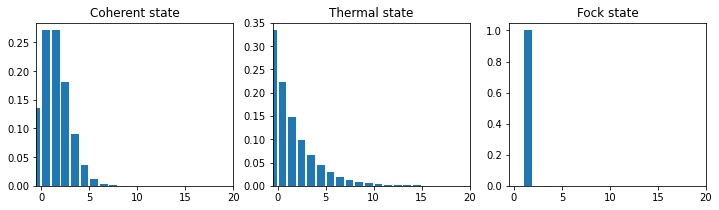

In [4]:
#  Next, we plot histograms of the diagonals of the density matrices:
fig, axes = plt.subplots(1, 3, figsize=(12,3))
bar0 = axes[0].bar(np.arange(0, N)-.5, rho_coherent.diag())
lbl0 = axes[0].set_title("Coherent state")
lim0 = axes[0].set_xlim([-.5, N])
bar1 = axes[1].bar(np.arange(0, N)-.5, rho_thermal.diag())
lbl1 = axes[1].set_title("Thermal state")
lim1 = axes[1].set_xlim([-.5, N])
bar2 = axes[2].bar(np.arange(0, N)-.5, rho_fock.diag())
lbl2 = axes[2].set_title("Fock state")
lim2 = axes[2].set_xlim([-.5, N])
plt.show()

All these states correspond to an average of two photons, but by visualizing the photon distribution in Fock basis the differences between these states are easily appreciated.

One frequently need to visualize the Fock-distribution in the way described above, so QuTiP provides a convenience function for doing this, see qutip.visualization.plot_fock_distribution, and the following example:

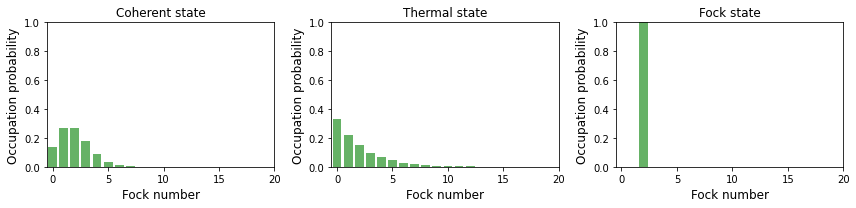

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))
plot_fock_distribution(rho_coherent, fig=fig, ax=axes[0], title="Coherent state");
plot_fock_distribution(rho_thermal, fig=fig, ax=axes[1], title="Thermal state");
plot_fock_distribution(rho_fock, fig=fig, ax=axes[2], title="Fock state");
fig.tight_layout()
plt.show()

## Quasi-probability distributions

The probability distribution in the number (Fock) basis only describes the occupation probabilities for a discrete set of states. A more complete phase-space probability-distribution-like function for harmonic modes are the Wigner and Husumi Q-functions, which are full descriptions of the quantum state (equivalent to the density matrix). These are called quasi-distribution functions because unlike real probability distribution functions they can for example be negative. In addition to being more complete descriptions of a state (compared to only the occupation probabilities plotted above), these distributions are also great for demonstrating if a quantum state is quantum mechanical, since for example a negative Wigner function is a definite indicator that a state is distinctly nonclassical.

### Wigner function

In QuTiP, the Wigner function for a harmonic mode can be calculated with the function qutip.wigner.wigner. It takes a ket or a density matrix as input, together with arrays that define the ranges of the phase-space coordinates (in the x-y plane). In the following example the Wigner functions are calculated and plotted for the same three states as in the previous section.

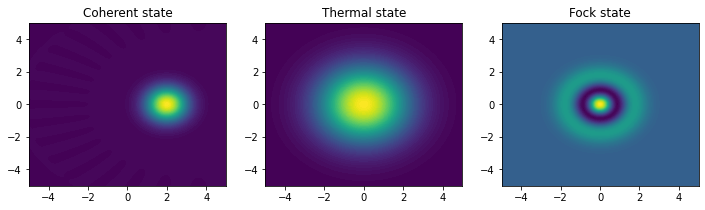

In [6]:
xvec = np.linspace(-5,5,200)
W_coherent = wigner(rho_coherent, xvec, xvec)
W_thermal = wigner(rho_thermal, xvec, xvec)
W_fock = wigner(rho_fock, xvec, xvec)

# plot the results
fig, axes = plt.subplots(1, 3, figsize=(12,3))
cont0 = axes[0].contourf(xvec, xvec, W_coherent, 100)
lbl0 = axes[0].set_title("Coherent state")
cont1 = axes[1].contourf(xvec, xvec, W_thermal, 100)
lbl1 = axes[1].set_title("Thermal state")
cont0 = axes[2].contourf(xvec, xvec, W_fock, 100)
lbl2 = axes[2].set_title("Fock state")
plt.show()

In [7]:
g_state = basis(2,0)
e_state = basis(2,1)
sz = sigmaz()
sm = destroy(2)
sp = sm.dag()
I_atom = qeye(2)
#define the operator of the atom(single Hilbert space)

In [8]:
Dimension_of_cavity = 2
a = destroy(Dimension_of_cavity)
adag = a.dag()
vac = basis(Dimension_of_cavity,0)
o = basis(Dimension_of_cavity,1)
I_cav = qeye(Dimension_of_cavity)
#define the operator of the cavity
print(o)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


In [9]:
g_vac = tensor(vac,g_state)
e_vac = tensor(o,e_state)
sz = tensor(I_cav,sz)
sm = tensor(I_cav,sm)
sp = sm.dag()

a = tensor(a,I_atom)
adag = tensor(adag,I_atom)
#define the full operator by tensor product

In [10]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
H0 = wc * (adag * a) + wa * sp * sm
H1 = (adag + a) * (sm + sp)

step=100
g_range = np.linspace(0,3,step+1)*2*np.pi
#generate the list of interaction g

g_list=[]
e_list = []

for g in g_range:
    H = H0 + g * H1
    enr,states = H.eigenstates()
    g_list.append(states[0])
    e_list.append(states[1])
#Using the method [eigtenstates] to obtain eigen states and energy
na = sm.dag() * sm  # atom
nc = a.dag() * a    # cavity
g_na_exp_list = expect(na,g_list)
g_nc_exp_list = expect(nc,g_list)
e_na_exp_list = expect(na,e_list)
e_nc_exp_list = expect(nc,e_list)
#get the excitation number of cavity and photon

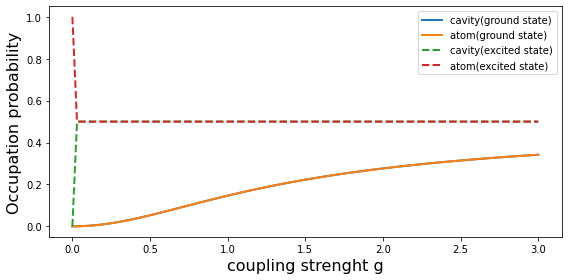

In [11]:
fig,axes = plt.subplots(figsize=(8,4))
axes.plot(g_range/(2*np.pi),g_nc_exp_list,linewidth = 2,label = "cavity(ground state)")
axes.plot(g_range/(2*np.pi),g_na_exp_list,linewidth = 2,label = "atom(ground state)")
axes.plot(g_range/(2*np.pi),e_nc_exp_list,'--',linewidth = 2,label = "cavity(excited state)")
axes.plot(g_range/(2*np.pi),e_na_exp_list,'--',linewidth = 2,label = "atom(excited state)")
axes.set_ylabel("Occupation probability", fontsize=16)
axes.set_xlabel("coupling strenght g", fontsize=16)
axes.legend()
fig.tight_layout()

# Introduction

The Jaynes-Cumming model is the simplest possible model of quantum mechanical light-matter interaction, describing a single two-level atom interacting with a single electromagnetic cavity mode. The Hamiltonian for this system is (in dipole interaction form)

### $H = \hbar \omega_c a^\dagger a + \frac{1}{2}\hbar\omega_a\sigma_z + \hbar g(a^\dagger + a)(\sigma_- + \sigma_+)$

or with the rotating-wave approximation

### $H_{\rm RWA} = \hbar \omega_c a^\dagger a + \frac{1}{2}\hbar\omega_a\sigma_z + \hbar g(a^\dagger\sigma_- + a\sigma_+)$

where $\omega_c$ and $\omega_a$ are the frequencies of the cavity and atom, respectively, and $g$ is the interaction strength.

In [93]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength
kappa = 0.0       # cavity dissipation rate
gamma = 0.        # atom dissipation rate
N = 2              # number of cavity fock states
n_th_a = 0.0        # avg number of thermal bath excitation
use_rwa = True

tlist = np.linspace(0,25,101)

# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom

# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))
sz = sm.dag()*sm - sm*sm.dag() 


# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag()) 
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())
print(psi0)
print(sm.dag() * sm)
print(tensor(qeye(2), qeye(2)))

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


### Create a list of collapse operators that describe the dissipation

In [77]:
c_ops = []

# cavity relaxation
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a)

# cavity excitation, if temperature > 0
rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a.dag())

# qubit relaxation
rate = gamma
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * sm)

### Evolve the system

Here we evolve the system with the Lindblad master equation solver, and we request that the expectation values of the operators $a^\dagger a$ and $\sigma_+\sigma_-$ are returned by the solver by passing the list `[a.dag()*a, sm.dag()*sm]` as the fifth argument to the solver.

In [78]:
output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm])

## Visualize the results

Here we plot the excitation probabilities of the cavity and the atom (these expectation values were calculated by the `mesolve` above). We can clearly see how energy is being coherently transferred back and forth between the cavity and the atom.

Text(0.5, 1.0, 'Vacuum Rabi oscillations')

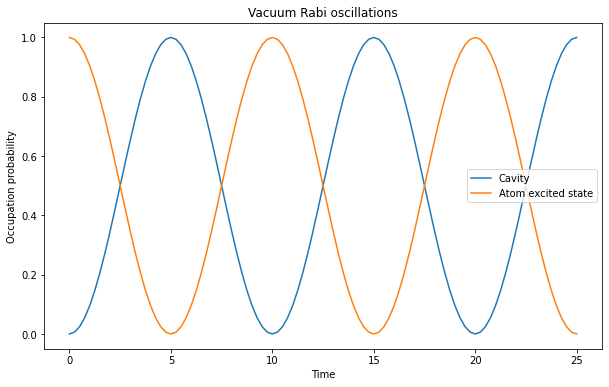

In [79]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations')

## Cavity wigner function

In addition to the cavity's and atom's excitation probabilities, we may also be interested in for example the wigner function as a function of time. The Wigner function can give some valuable insight in the nature of the state of the resonators. 

To calculate the Wigner function in QuTiP, we first recalculte the evolution without specifying any expectation value operators, which will result in that the solver return a list of density matrices for the system for the given time coordinates.

In [80]:
output = mesolve(H, psi0, tlist, c_ops, [])

In [81]:
output.states[-1] # indexing the list with -1 results in the last element in the list

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.00000000e+00+0.00000000e+00j]
 [-3.35479007e-05-1.86758239e-06j]
 [-9.30561810e-05-9.99999995e-01j]
 [ 0.00000000e+00+0.00000000e+00j]]

Now let's look at the Wigner functions at the point in time when atom is in its ground state: $t = \\{5, 15, 25\\}$ (see the plot above). 

For each of these points in time we need to:

 1. Find the system density matrix for the points in time that we are interested in.
 2. Trace out the atom and obtain the reduced density matrix for the cavity.
 3. Calculate and visualize the Wigner function fo the reduced cavity density matrix.

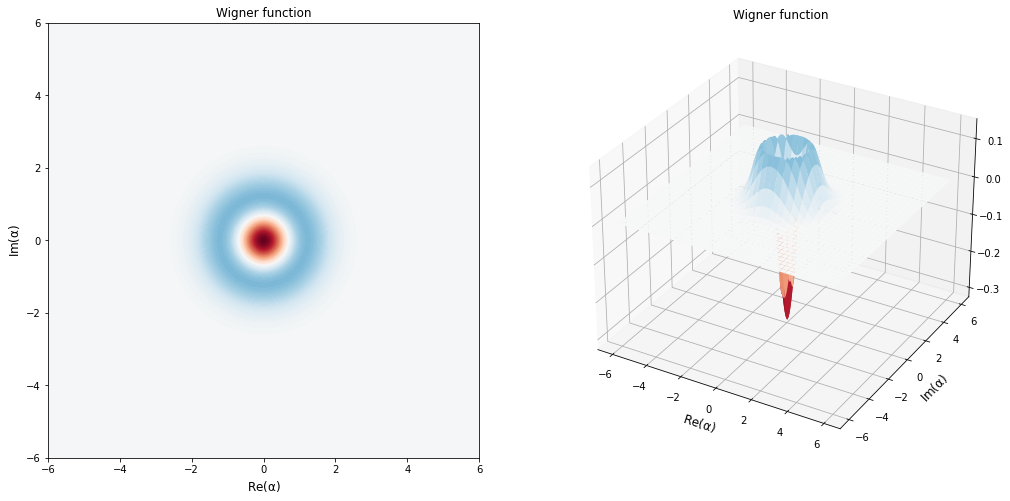

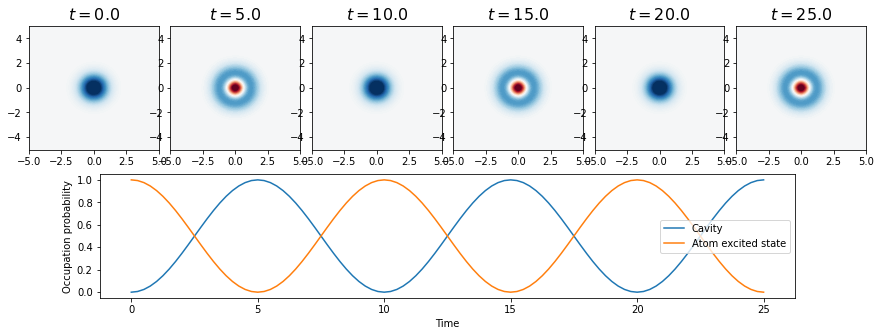

In [82]:
t_idx = np.where([tlist == t for t in [0.0, 5.0, 10, 15, 20, 25]])[1]
rho_list = [output.states[x] for x in t_idx]

fig_grid = (2, len(rho_list)*2)
fig = plt.figure(figsize=(2.5*len(rho_list),5))

for idx, rho in enumerate(rho_list):
    rho_cavity = ptrace(rho, 0)
    W = wigner(rho_cavity, xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (0, 2*idx), colspan=2)
    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.25,.25), cmap=plt.get_cmap('RdBu'))
    ax.set_title(r"$t = %.1f$" % tlist[t_idx][idx], fontsize=16)

# plot the cavity occupation probability in the ground state
ax = plt.subplot2grid(fig_grid, (1, 1), colspan=(fig_grid[1]-2))
ax.plot(tlist, n_c, label="Cavity")
ax.plot(tlist, n_a, label="Atom excited state")
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')


def plot_wigner_2d_3d(rho):
    #fig, axes = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
    fig = plt.figure(figsize=(17, 8))
    
    rho_cavity = ptrace(rho, 0)
    ax = fig.add_subplot(1, 2, 1)
    plot_wigner(rho_cavity, fig=fig, ax=ax, alpha_max=6);

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    plot_wigner(rho_cavity, fig=fig, ax=ax, projection='3d', alpha_max=6);
    
    plt.close(fig)
    return fig

rho = rho_list[3]
plot_wigner_2d_3d(rho)

At $t =0$, the cavity is in it's ground state. At $t = 5, 15, 25$ it reaches it's maxium occupation in this Rabi-vacuum oscillation process. We can note that for $t=5$ and $t=15$ the Wigner function has negative values, indicating a truely quantum mechanical state. At $t=25$, however, the wigner function no longer has negative values and can therefore be considered a classical state.

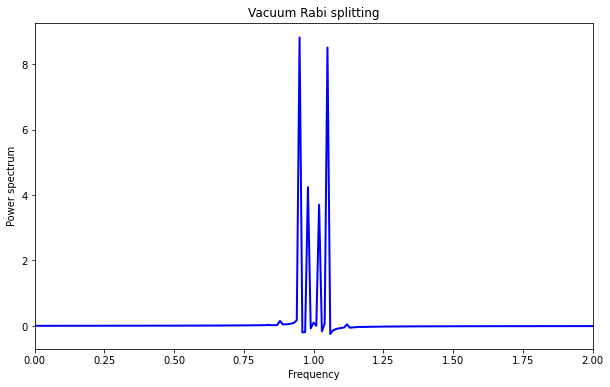

In [83]:
wc = 1.0 * 2 * np.pi
wa = 1 * 2 * np.pi
g = 0.05 * 2 * np.pi
kappa = 1e-19
gamma = 1e-19
N = 15


vac = tensor(basis(N,0),basis(2,0))
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))

H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
n_th = 0.25
c_ops = [np.sqrt(kappa * (1 + n_th)) * a, np.sqrt(kappa * n_th) * a.dag(), np.sqrt(gamma) * sm]


t_list = np.linspace(0,100,5000)
corr = correlation_2op_1t(H,None,t_list,c_ops,a.dag(),a)
wlist1,spec1 = spectrum_correlation_fft(t_list,corr)

fig, ax = plt.subplots(1, 1,figsize=(10,6))
ax.plot(wlist1 / (2 * np.pi), spec1, 'b', lw=2)

#wlist2 = np.linspace(0.25, 1.75, 200) * 2 * np.pi
#spec2 = spectrum_ss(H, wlist2, c_ops, a.dag(), a)
#ax.plot(wlist2 / (2 * np.pi), spec2,'r--', lw=2, label='me+fft method') 


#ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_title('Vacuum Rabi splitting')
ax.set_xlim(0,2)
plt.show()

In [84]:
np.where(spec1 > max(spec1)-0.01)
#find the peak

(array([2595]),)

In [85]:
w0 = wlist1[94]/(2*np.pi)
#frequency corresponding to peaks
w1 = wlist1[104]/(2*np.pi)

In [86]:
print('g = %f VS splitting = %f'%(g/(2*np.pi),(w1-w0)/2))
# prove that g = vacuum splitting/2

g = 0.050000 VS splitting = 0.049990


## Anti-crossing in the Spectrum-Detuning diagram
The spectrum-detuning experiment has been always used for showing light-matter interaction and affirming coupling strength.
There are serveral spectroscopic methods in cavityQED or circuitQED. We will simulate the case of spontaneous emission spectrum in the thermal bath to show basic idea and the anti-crossing in the spectrum diagram.

<ipython-input-45-73a30fd23873>:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(wlist1/(2*np.pi),Detuning_vec/(2*np.pi),spec_list)


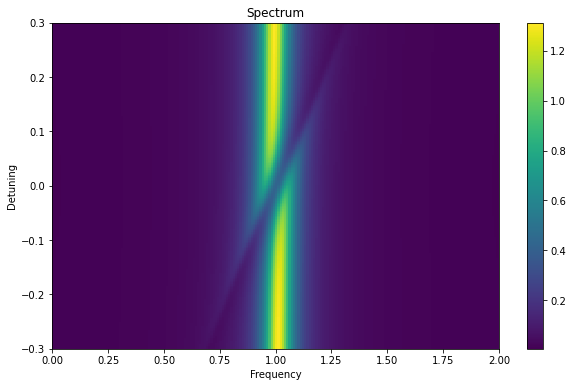

In [45]:
Detuning_vec = np.linspace(-0.3,0.3,201)*np.pi*2
wc = 1.0 * 2 * np.pi
g = 0.05 * 2 * np.pi
kappa = 0.75
gamma = 0.25
N = 15
vac = tensor(basis(N,0),basis(2,0))
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))
n_th = 0.25
c_ops = [np.sqrt(kappa * (1 + n_th)) * a, np.sqrt(kappa * n_th) * a.dag(), np.sqrt(gamma) * sm]
t_list = np.linspace(0,100,5000)

spec_list = []
for Delta in Detuning_vec:
    wa = wc + Delta
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
    corr = correlation_2op_1t(H,None,t_list,c_ops,a.dag(),a)
    wlist1,spec1 = spectrum_correlation_fft(t_list,corr)
    spec_list.append(spec1)
plt.subplots(1,1,figsize = (10,6))
z_min, z_max = -np.abs(spec_list).max(), np.abs(spec_list).max()
plt.pcolor(wlist1/(2*np.pi),Detuning_vec/(2*np.pi),spec_list)
plt.axis([0,2,-0.3,0.3])
plt.xlabel('Frequency')
plt.ylabel('Detuning')
plt.title('Spectrum')
plt.colorbar()

## Confirmation of Quantum State of Cavity
In addtion to the cavity's and atom's excitation probabilities, the quasi-probability distribution of the cavity state can give some valuable insight in the nature of the state of the cavity.
For instance, when there is negative probability density, we confirm that the cavity is in a non-classical state

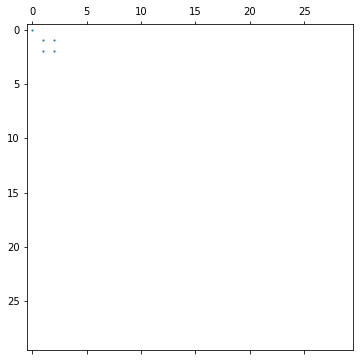

In [87]:
wc = 1.0 * 2 * np.pi
wa = 1.0 * 2 * np.pi
g = 0.05 * 2 * np.pi
kappa = 0.005
gamma = 0.05
N = 15
step = 1001

vac = tensor(basis(N,0),basis(2,0))
a = tensor(destroy(N),qeye(2))
sm = tensor(qeye(N),destroy(2))

H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
c_ops = [np.sqrt(kappa)*a,np.sqrt(gamma)*sm]
t_list = np.linspace(0,2.0,step)

psi0 = sm.dag() * vac

output = mesolve(H,psi0,t_list,c_ops,[])
fig = plt.figure(figsize=(8,6))
plt.spy(output.states[-1].data,ms=1)

## Find ground state as a function of coupling strength

In [98]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency

N = 15              # number of cavity fock states
use_rwa = False


# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

na = sm.dag() * sm  # atom
nc = a.dag() * a    # cavity

# decoupled Hamiltonian
H0 = wc * a.dag() * a + wa * sm.dag() * sm

# interaction Hamiltonian
if use_rwa:
    H1 = (a.dag() * sm + a * sm.dag())
else:
    H1 = (a.dag() + a) * (sm + sm.dag())
    
    

g_vec = np.linspace(0, 2.0, 101) * 2 * np.pi # coupling strength vector

psi_list = []

for g in g_vec:

    H = H0 + g * H1

    # find the groundstate and its energy
    gnd_energy, gnd_state = H.groundstate()
    
    # store the ground state
    psi_list.append(gnd_state)

na_expt = expect(na, psi_list) # qubit  occupation probability
nc_expt = expect(nc, psi_list) # cavity occupation probability

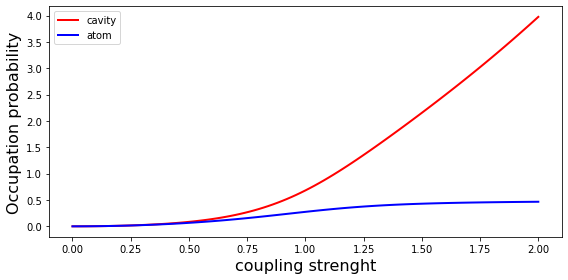

In [99]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,4))

axes.plot(g_vec/(2*np.pi), nc_expt, 'r', linewidth=2, label="cavity")
axes.plot(g_vec/(2*np.pi), na_expt, 'b', linewidth=2, label="atom")
axes.set_ylabel("Occupation probability", fontsize=16)
axes.set_xlabel("coupling strenght", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()

# Plot the wigner functions of the cavity as a function of coupling strength

Text(0, 0.5, 'Occupation probability')

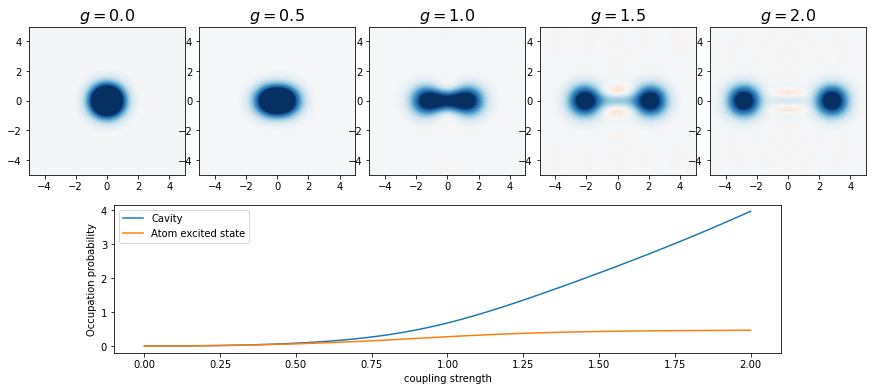

In [100]:
g_idx = np.where([g_vec == 2*np.pi*g for g in [0.0, 0.5, 1.0, 1.5, 2.0]])[1]
psi_sublist = [psi_list[x] for x in g_idx]

xvec = np.linspace(-5,5,200)

fig_grid = (2, len(psi_sublist)*2)
fig = plt.figure(figsize=(3*len(psi_sublist),6))

for idx, psi in enumerate(psi_sublist):
    rho_cavity = ptrace(psi, 0)
    W = wigner(rho_cavity, xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (0, 2*idx), colspan=2)
    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    ax.set_title(r"$g = %.1f$" % (g_vec[g_idx][idx]/(2*np.pi)), fontsize=16)

# plot the cavity occupation probability in the ground state
ax = plt.subplot2grid(fig_grid, (1, 1), colspan=(fig_grid[1]-2))
ax.plot(g_vec/(2*np.pi), nc_expt, label="Cavity")
ax.plot(g_vec/(2*np.pi), na_expt, label="Atom excited state")
ax.legend(loc=0)
ax.set_xlabel('coupling strength')
ax.set_ylabel('Occupation probability')

## Entropy of atom/cavity as a measure of entanglement

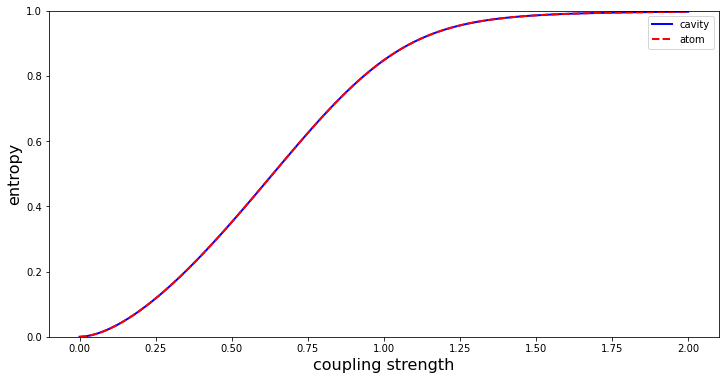

In [101]:
entropy_cavity = np.zeros(shape(g_vec))
entropy_atom   = np.zeros(shape(g_vec))

for idx, psi in enumerate(psi_list):
    
    rho_cavity = ptrace(psi, 0)
    entropy_cavity[idx] = entropy_vn(rho_cavity, 2)

    rho_atom = ptrace(psi, 1)
    entropy_atom[idx]   = entropy_vn(rho_atom, 2)
    
    
fig, axes = plt.subplots(1, 1, figsize=(12,6))
axes.plot(g_vec/(2*np.pi), entropy_cavity, 'b', label="cavity", linewidth=2)
axes.plot(g_vec/(2*np.pi), entropy_atom, 'r--', label="atom", linewidth=2)
axes.set_ylim(0,1)
axes.set_ylabel("entropy", fontsize=16)
axes.set_xlabel("coupling strength", fontsize=16)
axes.legend(loc=0)

## Dynamics of an initially excited cavity

In [102]:
psi0 = tensor(basis(N,1), basis(2,0))

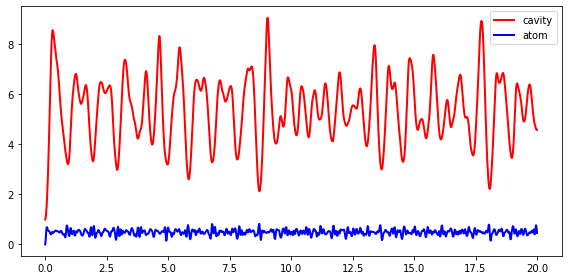

In [103]:
tlist = np.linspace(0, 20, 1000)
output = mesolve(H, psi0, tlist, [], [a.dag() * a, sm.dag() * sm])

fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,4))

axes.plot(tlist, np.real(output.expect[0]), 'r', linewidth=2, label="cavity")
axes.plot(tlist, np.real(output.expect[1]), 'b', linewidth=2, label="atom")
axes.legend(loc=0)

fig.tight_layout()

### Fock-state distribution and Wigner function for the cavity as a function of time

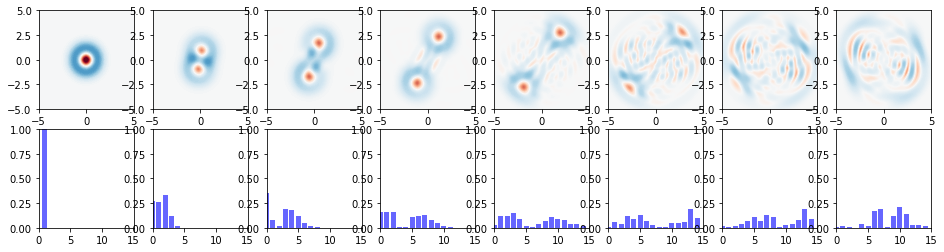

In [104]:
tlist = np.linspace(0, 0.35, 8)
output = mesolve(H, psi0, tlist, [], [])

rho_ss_sublist = output.states #[::4]

xvec = np.linspace(-5,5,200)

fig, axes = plt.subplots(2, len(rho_ss_sublist), figsize=(2*len(rho_ss_sublist), 4))

for idx, rho_ss in enumerate(rho_ss_sublist):

    # trace out the cavity density matrix
    rho_ss_cavity = ptrace(rho_ss, 0)
    
    # calculate its wigner function
    W = wigner(rho_ss_cavity, xvec, xvec)
    
    # plot its wigner function
    axes[0,idx].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.25,.25), 
                         cmap=plt.get_cmap('RdBu'))

    # plot its fock-state distribution
    axes[1,idx].bar(np.arange(0, N), np.real(rho_ss_cavity.diag()), color="blue", alpha=0.6)
    axes[1,idx].set_ylim(0, 1)
    axes[1,idx].set_xlim(0, N)

### Same thing with a little bit of dissipation

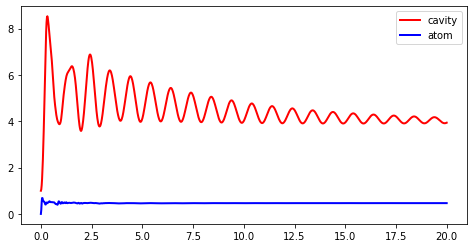

In [154]:
kappa = 0.25
tlist = np.linspace(0, 20, 1000)
output = mesolve(H, psi0, tlist, [np.sqrt(kappa) * a], [a.dag() * a, sm.dag() * sm])
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,4))
axes.plot(tlist, output.expect[0], 'r', linewidth=2, label="cavity")
axes.plot(tlist, output.expect[1], 'b', linewidth=2, label="atom")
axes.legend(loc=0)

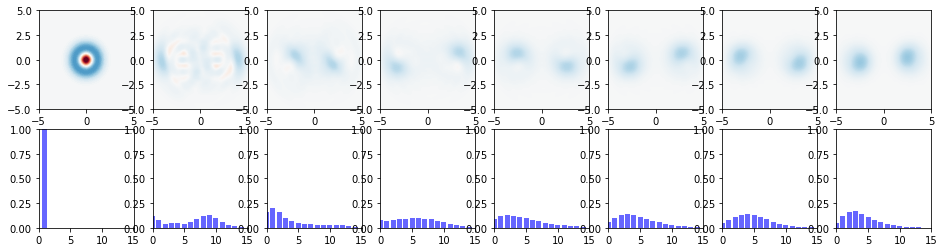

In [155]:
tlist = np.linspace(0, 10, 8)
output = mesolve(H, psi0, tlist, [np.sqrt(kappa) * a], [])

xvec = np.linspace(-5,5,200)

fig, axes = plt.subplots(2, len(output.states), figsize=(2*len(output.states), 4))

for idx, rho_ss in enumerate(output.states):

    # trace out the cavity density matrix
    rho_ss_cavity = ptrace(rho_ss, 0)
    
    # calculate its wigner function
    W = wigner(rho_ss_cavity, xvec, xvec)
    
    # plot its wigner function
    axes[0,idx].contourf(xvec, xvec, W, 100, 
                         norm=mpl.colors.Normalize(-.25,.25), cmap=plt.get_cmap('RdBu'))

    # plot its fock-state distribution
    axes[1,idx].bar(np.arange(0, N), np.real(rho_ss_cavity.diag()), color="blue", alpha=0.6)
    axes[1,idx].set_ylim(0, 1)
    axes[1,idx].set_xlim(0, N)

### Entropy as a function of time in presence of dissipation and starting in the ideal ground state

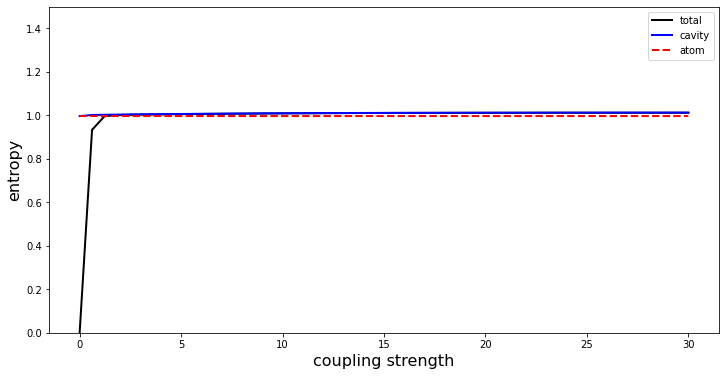

In [156]:
tlist = np.linspace(0, 30, 50)

psi0 = H.groundstate()[1]

output = mesolve(H, psi0, tlist, [np.sqrt(kappa) * a], [])

entropy_tot    = np.zeros(shape(tlist))
entropy_cavity = np.zeros(shape(tlist))
entropy_atom   = np.zeros(shape(tlist))

for idx, rho in enumerate(output.states):
    
    entropy_tot[idx] = entropy_vn(rho, 2)    
    
    rho_cavity = ptrace(rho, 0)
    entropy_cavity[idx] = entropy_vn(rho_cavity, 2)

    rho_atom = ptrace(rho, 1)
    entropy_atom[idx]   = entropy_vn(rho_atom, 2)
    
fig, axes = plt.subplots(1, 1, figsize=(12,6))
axes.plot(tlist, entropy_tot, 'k', label="total", linewidth=2)
axes.plot(tlist, entropy_cavity, 'b', label="cavity", linewidth=2)
axes.plot(tlist, entropy_atom, 'r--', label="atom", linewidth=2)
axes.set_ylabel("entropy", fontsize=16)
axes.set_xlabel("coupling strength", fontsize=16)
axes.set_ylim(0, 1.5)
axes.legend(loc=0)

In [157]:
tensor()

TypeError: Requires at least one input argument

In [169]:
tensor([1,10,100], [5,7])

TypeError: One of inputs is not a quantum object

In [166]:
create(5)*fock(5,2)

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [0.        ]
 [1.73205081]
 [0.        ]]

In [30]:
create(5)*destroy(5)

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 4.]]